# Recursive Text Editing: Result

In [151]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

__author__ = 'Shining'
__email__ = 'mrshininnnnn@gmail.com'

In [152]:
# dependency
# public
import os
%matplotlib inline
# private
from utils import *

## Increasing Sequence Length Analysis

In [75]:
# parameters
method = 'end2end'
model_name = 'gru_rnn'
vocab_size = 10
min_seq_len = 5
max_seq_len = 10
data_size = 100000

In [127]:
# define path
LOG_PATH = 'log'
TASK_PATH = os.path.join(
    method, 
    'vocab_size_{}'.format(vocab_size), 
    'seq_len_{}', 
    'data_size_{}'.format(data_size), 
    '{}.txt'.format(model_name))

In [80]:
# read data
raw_data_dict = {}
for i in range(min_seq_len, max_seq_len+1, 1):
    file_name = os.path.join(
        LOG_PATH, 
        TASK_PATH.format(i))
    raw_data_dict[file_name] = load_txt(file_name)

In [81]:
# take a look at keys
print(list(raw_data_dict.keys()))

['log/end2end/vocab_size_10/seq_len_5/data_size_100000/gru_rnn.txt', 'log/end2end/vocab_size_10/seq_len_6/data_size_100000/gru_rnn.txt', 'log/end2end/vocab_size_10/seq_len_7/data_size_100000/gru_rnn.txt', 'log/end2end/vocab_size_10/seq_len_8/data_size_100000/gru_rnn.txt', 'log/end2end/vocab_size_10/seq_len_9/data_size_100000/gru_rnn.txt', 'log/end2end/vocab_size_10/seq_len_10/data_size_100000/gru_rnn.txt']


In [82]:
# extract info from log
# keys = ['epoch', 'step', 'loss', 'acc', 'token_acc', 'seq_acc']
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [171]:
criteria = 'loss'
criteria_dict = {}
for i in range(min_seq_len, max_seq_len+1, 1):
    label = 'seq_len_{}'.format(i)
    key = os.path.join(LOG_PATH, TASK_PATH.format(i))
    criteria_list = [data[criteria] for data in data_dict[key]]
    criteria_dict[label] = criteria_list

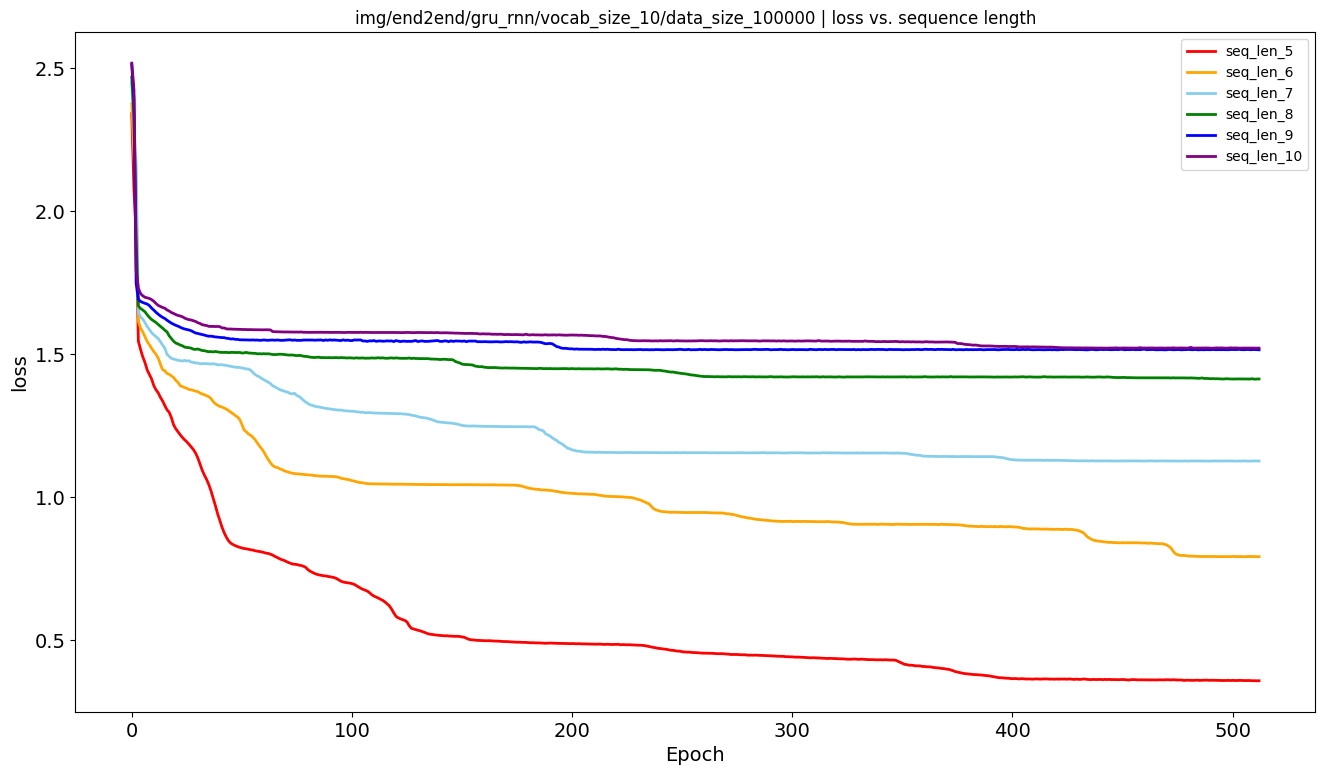

In [173]:
colors = ['red', 'orange', 'skyblue', 'green', 'blue', 'purple']
save_path = os.path.join(
    'img', 
    method, 
    model_name, 
    'vocab_size_{}'.format(vocab_size), 
    'data_size_{}'.format(data_size))

if not os.path.exists(save_path): os.makedirs(save_path)

title = '{} vs. sequence length'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Epoch', 
    ylabel=criteria, 
    save_path=save_path)

## Increasing Data Size Analysis

In [463]:
# parameters
method = 'recursion' # end2end, recursion
data_mode = 'online' # online, offline
model_name = 'bi_lstm_rnn_att'
num_size = 10
seq_len = 5
min_data_size = 10000
max_data_size = 50000

In [464]:
# define path
LOG_PATH = os.path.join(
    'log', 
    data_mode, 
    method,
    'num_size_{}'.format(vocab_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}', 
    '{}.txt'.format(model_name))

In [465]:
# read data
raw_data_dict = {}
for i in range(min_data_size, max_data_size+1, 10000):
    file_name = LOG_PATH.format(i)
    print(file_name)
    raw_data_dict[file_name] = load_txt(file_name)

log/online/recursion/num_size_10/seq_len_5/data_size_10000/bi_lstm_rnn_att.txt
log/online/recursion/num_size_10/seq_len_5/data_size_20000/bi_lstm_rnn_att.txt
log/online/recursion/num_size_10/seq_len_5/data_size_30000/bi_lstm_rnn_att.txt
log/online/recursion/num_size_10/seq_len_5/data_size_40000/bi_lstm_rnn_att.txt
log/online/recursion/num_size_10/seq_len_5/data_size_50000/bi_lstm_rnn_att.txt


In [466]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [469]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Equation Accuracy'
criteria_dict = {}
for i in range(min_data_size, max_data_size+1, 10000):
    label = 'data_size_{}'.format(i)
    key = LOG_PATH.format(i)
    criteria_list = [data[criteria] for data in data_dict[key]]
    criteria_dict[label] = criteria_list

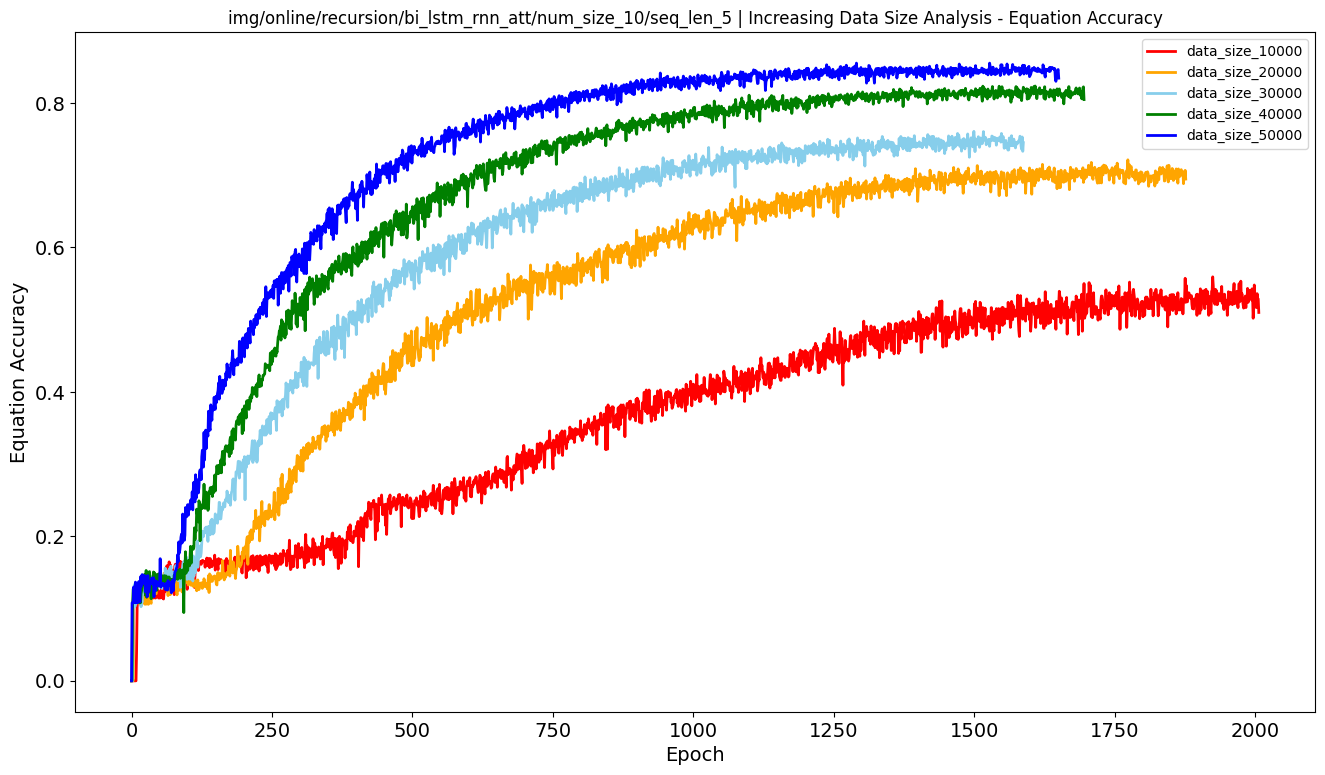

In [470]:
colors = ['red', 'orange', 'skyblue', 'green', 'blue']
save_path = os.path.join(
    'img', 
    data_mode, 
    method, 
    model_name, 
    'num_size_{}'.format(vocab_size), 
    'seq_len_{}'.format(seq_len))

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Data Size Analysis - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Epoch', 
    ylabel=criteria, 
    save_path=save_path)

## Methods Comparison

In [457]:
# parameters
candidates = [
#     ['offline', 'end2end'], 
#     ['offline', 'recursion'], 
    ['online', 'end2end'], 
    ['online', 'recursion']
]
model_name = 'bi_lstm_rnn_att'
num_size = 10
seq_len = 5
data_size = 10000

In [458]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    '{}', # data mode
    '{}', # method
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}'.format(data_size), 
    '{}.txt'.format(model_name))

In [459]:
# read data
raw_data_dict = {}
for c in candidates:
    file_path = LOG_PATH.format(c[0], c[1])
    print(file_path)
    raw_data_dict[file_path] = load_txt(file_path)

log/online/end2end/num_size_10/seq_len_5/data_size_10000/bi_lstm_rnn_att.txt
log/online/recursion/num_size_10/seq_len_5/data_size_10000/bi_lstm_rnn_att.txt


In [460]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [461]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Sequence Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    key = LOG_PATH.format(c[0], c[1])
    criteria_list = [data[criteria] for data in data_dict[key]]
    criteria_dict[label] = criteria_list

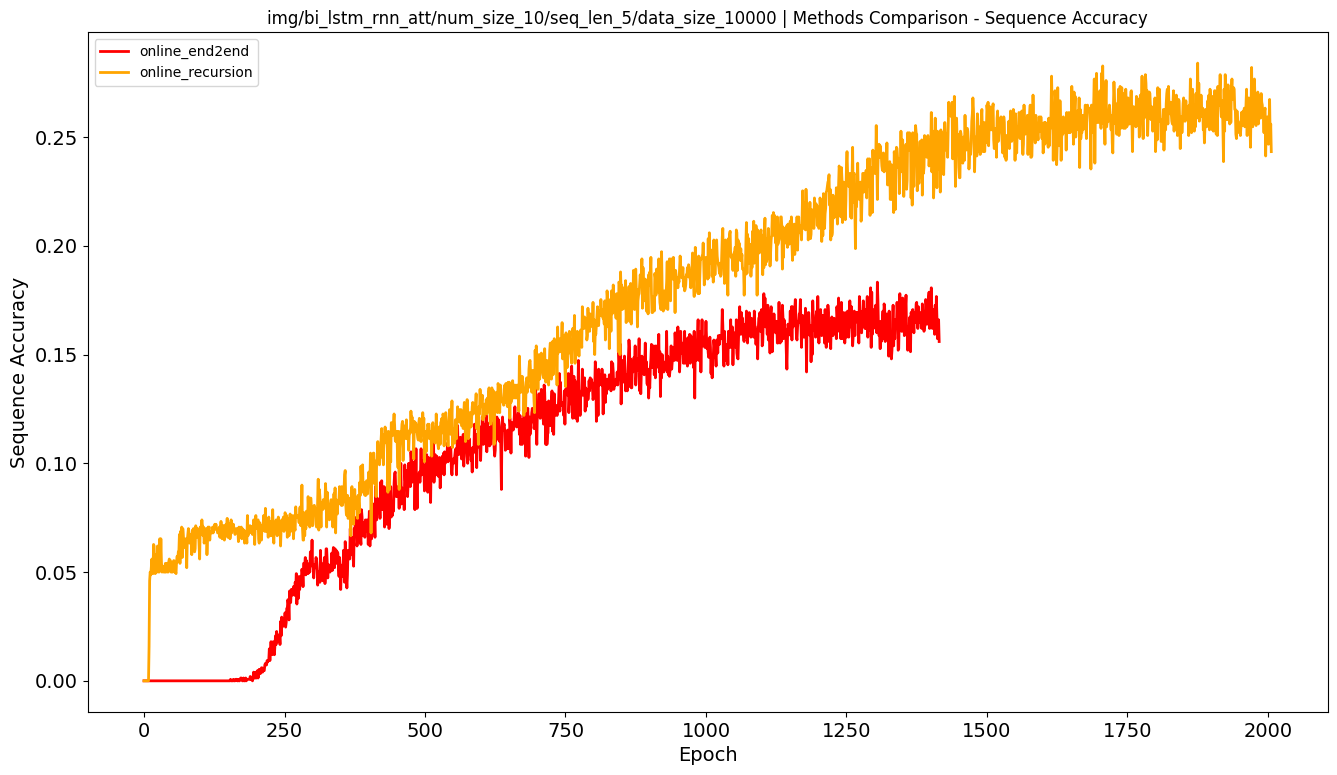

In [462]:
colors = ['red', 'orange', 'green', 'blue']
save_path = os.path.join(
    'img', 
    model_name, 
    'num_size_{}'.format(vocab_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}'.format(data_size))

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Methods Comparison - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Epoch', 
    ylabel=criteria, 
    save_path=save_path)

## Methods vs. Data Size

In [451]:
# parameters
candidates = [
    ['offline', 'end2end'], 
    ['offline', 'recursion'], 
    ['online', 'end2end'], 
    ['online', 'recursion']
]
data_mode = 'online'
model_name = 'bi_lstm_rnn_att'
vocab_size = 10
seq_len = 5
min_data_size = 10000
max_data_size = 50000

In [452]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    '{}', # data mode
    '{}', # method
    'vocab_size_{}'.format(vocab_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}', # data size 
    '{}.txt'.format(model_name))

In [453]:
# read data
raw_data_dict = {}
for c in candidates: 
    for i in range(min_data_size, max_data_size+1, 10000): 
        file_name = LOG_PATH.format(c[0], c[1], i)
        print(file_name)
        raw_data_dict[file_name] = load_txt(file_name)

log/offline/end2end/vocab_size_10/seq_len_5/data_size_10000/bi_lstm_rnn_att.txt
log/offline/end2end/vocab_size_10/seq_len_5/data_size_20000/bi_lstm_rnn_att.txt
log/offline/end2end/vocab_size_10/seq_len_5/data_size_30000/bi_lstm_rnn_att.txt
log/offline/end2end/vocab_size_10/seq_len_5/data_size_40000/bi_lstm_rnn_att.txt
log/offline/end2end/vocab_size_10/seq_len_5/data_size_50000/bi_lstm_rnn_att.txt
log/offline/recursion/vocab_size_10/seq_len_5/data_size_10000/bi_lstm_rnn_att.txt
log/offline/recursion/vocab_size_10/seq_len_5/data_size_20000/bi_lstm_rnn_att.txt
log/offline/recursion/vocab_size_10/seq_len_5/data_size_30000/bi_lstm_rnn_att.txt
log/offline/recursion/vocab_size_10/seq_len_5/data_size_40000/bi_lstm_rnn_att.txt
log/offline/recursion/vocab_size_10/seq_len_5/data_size_50000/bi_lstm_rnn_att.txt
log/online/end2end/vocab_size_10/seq_len_5/data_size_10000/bi_lstm_rnn_att.txt
log/online/end2end/vocab_size_10/seq_len_5/data_size_20000/bi_lstm_rnn_att.txt
log/online/end2end/vocab_size_10

In [454]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [455]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Sequence Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    criteria_list = []
    for i in range(min_data_size, max_data_size+1, 10000):
        key = LOG_PATH.format(c[0], c[1], i)
        criteria_list.append(data_dict[key][-1][criteria])
    criteria_dict[label] = criteria_list

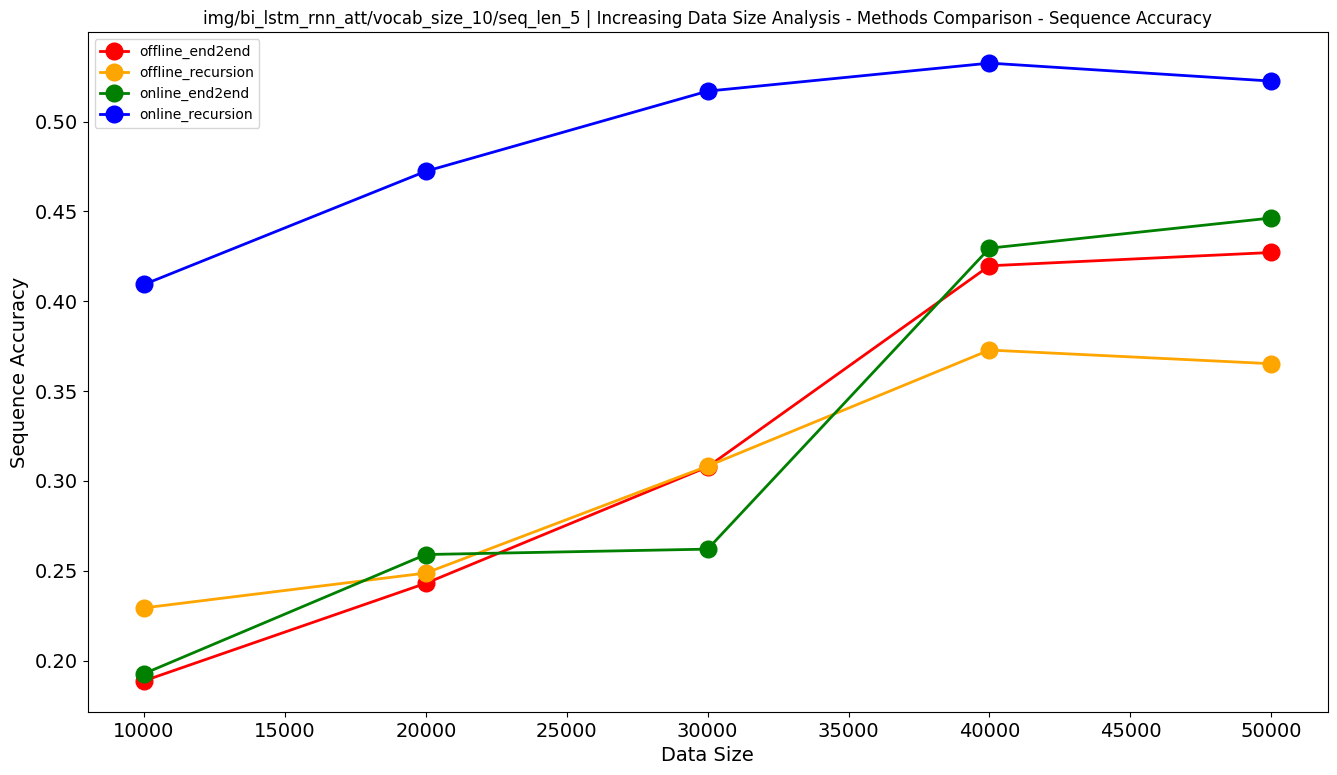

In [456]:
colors = ['red', 'orange', 'green', 'blue']
save_path = os.path.join(
    'img', 
    model_name, 
    'vocab_size_{}'.format(vocab_size), 
    'seq_len_{}'.format(seq_len))

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Data Size Analysis - Methods Comparison - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Data Size', 
    ylabel=criteria, 
    save_path=save_path, 
    yticks=range(min_data_size, max_data_size+1, 10000), 
    marker=True
)